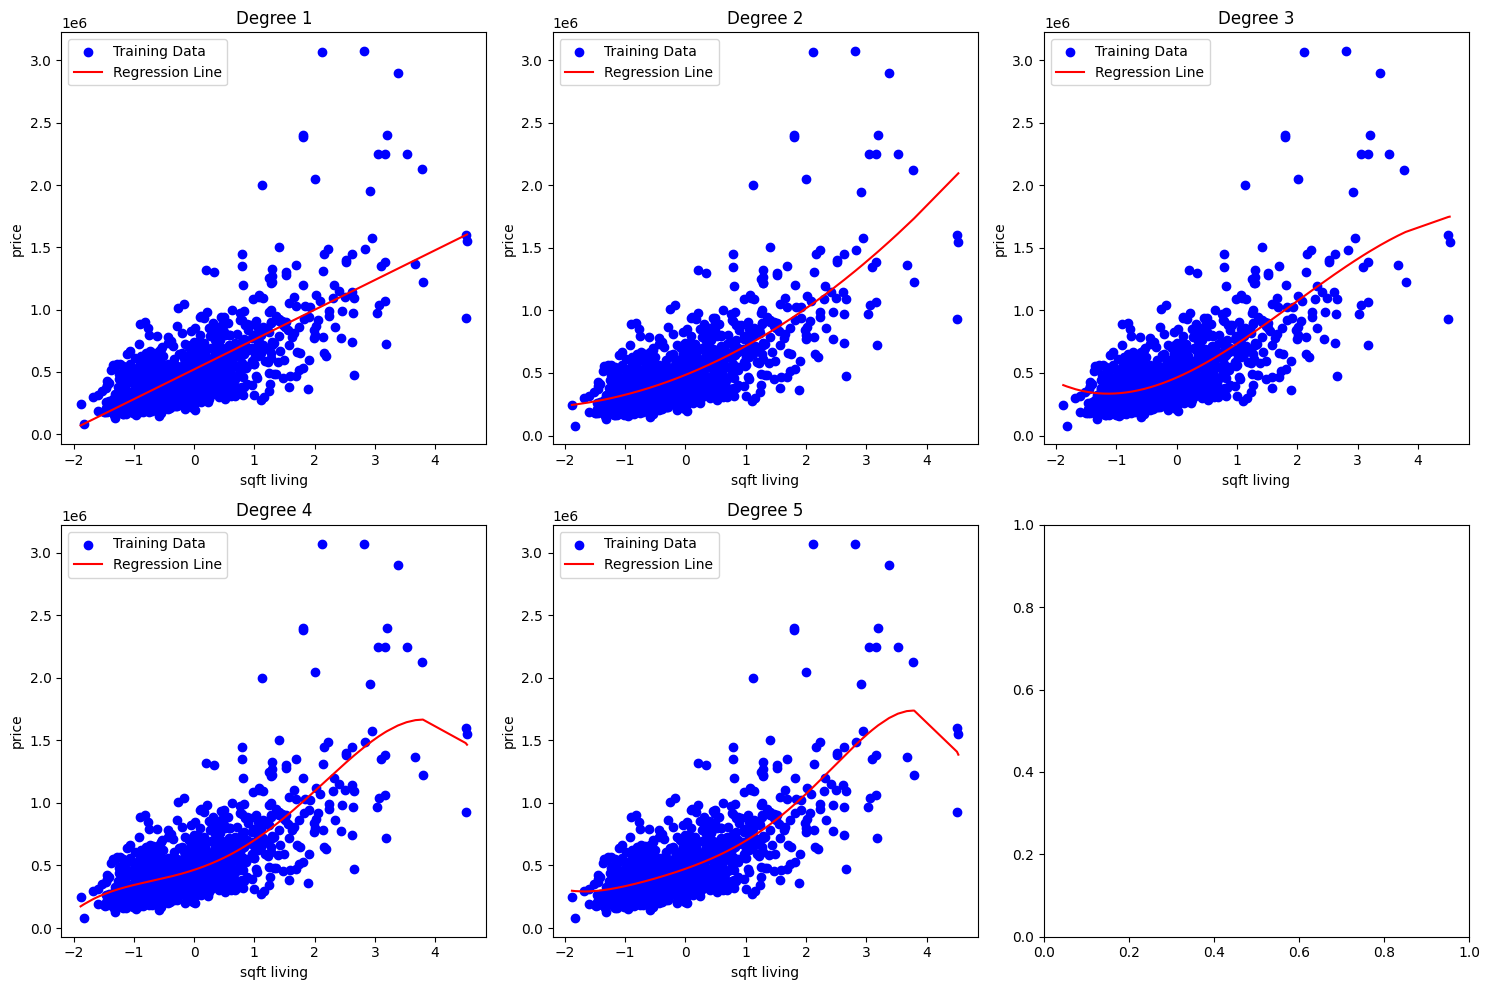

   Degree     MSE Train  R2 Train      MSE Test   R2 Test
0       1  5.794753e+10  0.496709  8.857598e+10  0.468736
1       2  5.482267e+10  0.523849  7.179168e+10  0.569406
2       3  5.378519e+10  0.532860  9.983348e+10  0.401216
3       4  5.279577e+10  0.541453  2.509793e+11 -0.505331
4       5  5.262611e+10  0.542927  5.706169e+11 -2.422464


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import warnings     # filter warning messages
warnings.simplefilter(action="ignore")


def polynomial_features(X, degree):
    """
    Generate polynomial features up to the specified degree.
    """
    X_poly = np.column_stack([X ** i for i in range(1, degree + 1)])
    return X_poly

def fit_polynomial_regression(X_train, y_train, X_test, y_test, degree):
    """
    Fit a polynomial regression model with the specified degree.
    """
    # Generate polynomial features
    X_train_poly = polynomial_features(X_train, degree)
    X_test_poly = polynomial_features(X_test, degree)

    # Add a column of ones for the intercept term
    X_train_poly = np.hstack((np.ones((X_train_poly.shape[0], 1)), X_train_poly))
    X_test_poly = np.hstack((np.ones((X_test_poly.shape[0], 1)), X_test_poly))

    # Fit the model using least squares
    coefficients = np.linalg.inv(X_train_poly.T @ X_train_poly) @ X_train_poly.T @ y_train

    # Predict on training and testing data
    y_train_pred = X_train_poly @ coefficients
    y_test_pred = X_test_poly @ coefficients

    # Calculate MSE and R^2 metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    return mse_train, r2_train, mse_test, r2_test, X_train_poly, y_train_pred

# Read and preprocess the data
house_data_train = pd.read_csv('train.csv').drop(columns=['Unnamed: 0', 'zipcode'])
house_data_test = pd.read_csv('test.csv').drop(columns=['Unnamed: 0', 'id', 'date', 'zipcode'])

scaler = StandardScaler()
X_train = scaler.fit_transform(house_data_train[['sqft_living']])
y_train = house_data_train['price']
X_test = scaler.transform(house_data_test[['sqft_living']])
y_test = house_data_test['price']

# Define degrees to consider
degrees = [1, 2, 3, 4, 5]

# Initialize results dictionary
results = {'Degree': [], 'MSE Train': [], 'R2 Train': [], 'MSE Test': [], 'R2 Test': []}

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

# Iterate over different degrees
for i, degree in enumerate(degrees):
    mse_train, r2_train, mse_test, r2_test, X_train_poly, y_train_pred = fit_polynomial_regression(X_train, y_train, X_test, y_test, degree)

    results['Degree'].append(degree)
    results['MSE Train'].append(mse_train)
    results['R2 Train'].append(r2_train)
    results['MSE Test'].append(mse_test)
    results['R2 Test'].append(r2_test)

    # Plot training data
    axs[i].scatter(X_train, y_train, color='blue', label='Training Data')

    # Plot regression line
    sort_indices = np.argsort(X_train, axis=0).flatten()
    axs[i].plot(X_train[sort_indices], y_train_pred[sort_indices], color='red', label='Regression Line')

    axs[i].set_title(f'Degree {degree}')
    axs[i].set_xlabel('sqft living')
    axs[i].set_ylabel('price')
    axs[i].legend()

plt.tight_layout()
plt.show()

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Display results
print(results_df)
